# Import necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset

In [3]:
df = pd.read_csv('data.csv')
df

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [5]:
df.columns

Index(['URLs', 'Headline', 'Body', 'Label'], dtype='object')

# Data Preprocessing

In [6]:
# Handle missing values in the 'Body' column
df['Body'].fillna('', inplace=True)
# Tokenize and clean the text
# Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')  # Adjust parameters as needed
X = tfidf_vectorizer.fit_transform(df['Body'])
y = df['Label']

# Split the dataset into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model

In [8]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

# Predictions

In [9]:
y_pred = logistic_regression.predict(X_test)

# Evaluation

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9663341645885287
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       455
           1       0.94      0.99      0.96       347

    accuracy                           0.97       802
   macro avg       0.96      0.97      0.97       802
weighted avg       0.97      0.97      0.97       802



# Plot the distribution of labels in the dataset

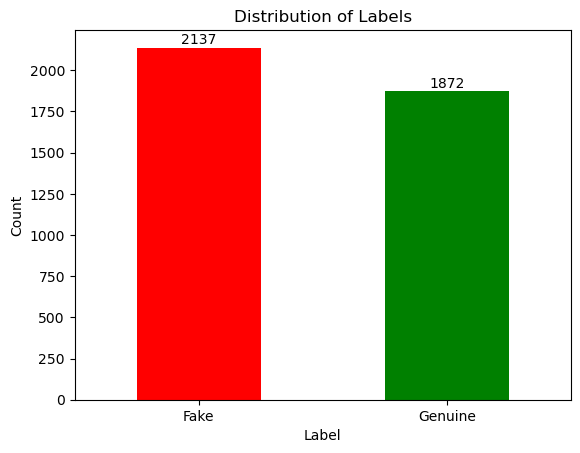

In [35]:
import matplotlib.pyplot as plt

ax = df['Label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake', 'Genuine'], rotation=0)

# Add counts at the top of each bar
for f, g in enumerate(df['Label'].value_counts()):
    ax.text(f, g + 5, str(g), color='black', ha='center', va='bottom')

plt.show()

# Now, you can use this trained model to predict whether new news articles are fake or genuine.

In [27]:
new_article_text = input("Your news article Link here...")
new_article_tfidf = tfidf_vectorizer.transform([new_article_text])
prediction = logistic_regression.predict(new_article_tfidf)

if prediction[0] == 1:
    print("The news article is predicted to be fake.")
else:
    print("The news article is predicted to be genuine.")

Your new article text goes here...https://www.nytimes.com/2017/10/10/us/politics/kansas-tried-a-tax-plan-similar-to-trumps-it-
The news article is predicted to be genuine.
